In [1]:
#!pip install torch numpy pandas matplotlib

In [2]:
import torch
import numpy as np

### Create a Numpy Array and compute 2 * x + y

In [3]:
x = np.array([[1,2,3], [4,5,6]])
y = np.array([[7,8,9], [10,11,12]])
f = 2 * x + y
print(f)

[[ 9 12 15]
 [18 21 24]]


### Create a Tensor and compute 2 * x + y

In [4]:
x = torch.tensor([[1,2,3], [4,5,6]])
y = torch.tensor([[7,8,9], [10,11,12]])
f = 2 * x + y
print(f)

tensor([[ 9, 12, 15],
        [18, 21, 24]])


### Default Value Initialization

In [5]:
shape = [2,3]
xzeros = torch.zeros(shape)
xones = torch.ones(shape)
xrnd = torch.rand(shape)
print(xzeros)
print(xones)
print(xrnd)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0.6122, 0.3229, 0.0812],
        [0.2985, 0.7375, 0.2466]])


### Bad way to set seed (global seed)

In [6]:
torch.manual_seed(42)
print(torch.rand([2,3]))

tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009]])


### Good way to set seed (using generator)

In [7]:
generator = torch.Generator().manual_seed(42)
print(torch.rand([2,3], generator=generator))

tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009]])


### Converting between tensors and NumPy arrays

In [8]:
xnp = np.array([[1,2,3],[4,5,6]])
xnp2 = np.array([[1,2,3],[4,5,6]])
f2 = y + xnp
print(f2)
f2.type()

tensor([[ 8, 10, 12],
        [14, 16, 18]])


'torch.LongTensor'

In [9]:
print(f.type()) # call the tensors type method
fnp = f.numpy() # create an array from the tensor
type(fnp) # uses the python inbuilt type()

torch.LongTensor


numpy.ndarray

In [10]:
xtensor = torch.tensor(xnp) # Don't use torch.from_numpy
xtensor2 = torch.from_numpy(xnp2) # Don't use torch.from_numpy
print(xtensor)
print(xtensor.type())
print(xtensor2)
print(xtensor2.type())

tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)
torch.IntTensor
tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)
torch.IntTensor


In [11]:
a = np.ones(3)
t = torch.tensor(a)      # create a tensor from an array
b = t.numpy()                # Create an array from the tensor
b[1] = 0                     # change a value in the array
print(a[1] == b[1])          # this value changes in the original array
print(b)
print(t)                     # and also in the tensor - they share the same memory

False
[1. 0. 1.]
tensor([1., 0., 1.], dtype=torch.float64)


### Data Types with Numpy and Pytorch

In [12]:
int8np = np.ones((2,3), dtype=np.int8)
bad = torch.tensor(int8np)
bad.type()

'torch.CharTensor'

In [13]:
not_so_good = torch.tensor(int8np.astype(np.int32))
not_so_good.type()

'torch.IntTensor'

In [14]:
good = torch.tensor(int8np, dtype=torch.int)
good.type()

'torch.IntTensor'

In [15]:
xint = torch.ones((2,3), dtype=torch.int)
xint.type()
print(xint)

tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int32)


### Slicing and indexing and reshaping

In [16]:
x = torch.tensor([[1,2,3], [4,5,6]])
print(x[0])
print(x[1][0:2])

tensor([1, 2, 3])
tensor([4, 5])


In [17]:
print(x)
print(x.size())
print(x.view(-1))
print(x.view(3,2))
print(x.view(6,1))

tensor([[1, 2, 3],
        [4, 5, 6]])
torch.Size([2, 3])
tensor([1, 2, 3, 4, 5, 6])
tensor([[1, 2],
        [3, 4],
        [5, 6]])
tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]])


In [18]:
print(x.view(3,-1))

tensor([[1, 2],
        [3, 4],
        [5, 6]])


In [19]:
print(x.transpose(0,1).size())
x.size()

torch.Size([3, 2])


torch.Size([2, 3])

In [20]:
a = torch.ones(1,2,3,4)
print(a.transpose(0,3).transpose(1,2).size())    #swaps axis in two steps
print(a.permute(3,2,1,0).size())                 #swaps all axis at once

torch.Size([4, 3, 2, 1])
torch.Size([4, 3, 2, 1])


In [21]:
print(x)
x.transpose_(1,0)
print(x)

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[1, 4],
        [2, 5],
        [3, 6]])


## 1. Load fish.csv and convert it to a tensor but ignore first column (Species). Split column "Width" as target variable and all other as input variables

In [22]:
import pandas as pd
fish_data = pd.read_csv('fish.csv')
fish_data

,Species,Length1,Length2,Length3,Height,Width
0,Bream,23.2,25.4,30.0,11.5200,4.0200
1,Bream,24.0,26.3,31.2,12.4800,4.3056
2,Bream,23.9,26.5,31.1,12.3778,4.6961
3,Bream,26.3,29.0,33.5,12.7300,4.4555
4,Bream,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,13.2,14.3,15.2,2.8728,2.0672


In [23]:
X = fish_data[["Length1", "Length2", "Length3", "Height"]].to_numpy() # Input variables (Numpy)
print(X.shape)
y = fish_data["Width"].to_numpy() # Target Variable (Numpy)
print(y.shape)
X,y = torch.tensor(X), torch.tensor(y)

(159, 4)
(159,)


## 2. Split fish_data into training (n=127) and test set (n=32), randomly.

In [24]:
from sklearn.model_selection import train_test_split
generator = torch.Generator().manual_seed(42)
idx = torch.randperm(X.shape[0], generator=generator)
X_train, X_test = X[idx[:127],:], X[idx[127:],:]
y_train, y_test = train_test_split(y, test_size= 127, random_state=42)

## 3.1. Normalize Dataset: X = (X - X.min) / (X.max - X.min)

In [25]:
# Lambda Function
normalize = lambda z, z_min, z_max: (z / z_min) / (z_max / z_min + 1e-7)
#print(X_train.min(0, keepdim=True)[0])
# Normalize X
x_min, x_max = X_train.min(0, keepdim=True)[0], X_train.max(0, keepdim=True)[0]
X_train_n, X_test_n = normalize(X_train, x_min, x_max), normalize(X_test, x_min, x_max)
# Normalize y
y_min, y_max = y_train.min(0,keepdim=True)[0], y_train.max(0,keepdim=True)[0]
y_train_n, y_test_n = normalize(y_train, y_min, y_max), normalize(y_test, y_min, y_max)

## 3.2. Standardize Dataset: X = (X - X.mean) / X.std

In [26]:
# Lambda Function
standardize = lambda z, z_mean, z_std: (z - z_mean) / (z_std + 1e-7)

# Standardize X
x_mean, x_std = X_train.mean(0, keepdim=True)[0], X_train.std(0, keepdim=True)[0]

X_train_s, X_test_s = standardize(X_train, x_mean, x_std), standardize(X_test, x_mean, x_std)
#print(X_train_s)
# Standardize y
y_mean, y_std = y_train.mean(0,keepdim=True)[0], y_train.std(0,keepdim=True)[0]
y_train_s, y_test_s = standardize(y_train, y_mean, y_std), standardize(y_test, y_mean, y_std)

## 4. Plot normalized, standardized vs non-normalized

In [31]:
X_train[:]

tensor([[18.6000, 20.0000, 22.2000,  6.2160],
        [23.5000, 25.6000, 27.0000,  6.5610],
        [25.9000, 28.0000, 29.4000,  7.8204],
        [19.3000, 21.3000, 22.8000,  6.3840],
        [15.0000, 16.2000, 17.2000,  4.5924],
        [20.5000, 22.5000, 24.0000,  6.7920],
        [15.7000, 17.4000, 18.5000,  4.5880],
        [23.6000, 25.2000, 27.9000,  7.0866],
        [59.0000, 63.4000, 68.0000, 10.8120],
        [37.1000, 40.0000, 42.5000, 11.1350],
        [13.8000, 15.0000, 16.0000,  3.8240],
        [33.5000, 37.0000, 42.6000, 18.9570],
        [42.0000, 45.0000, 48.0000,  6.9600],
        [40.0000, 42.5000, 45.5000,  6.8250],
        [20.0000, 22.0000, 23.5000,  5.5225],
        [31.0000, 33.5000, 38.7000, 14.4738],
        [52.0000, 56.0000, 59.7000, 10.6863],
        [19.4000, 21.0000, 23.7000,  6.1146],
        [22.0000, 24.0000, 25.5000,  7.2930],
        [26.3000, 29.0000, 33.5000, 12.7300],
        [23.0000, 25.0000, 28.0000, 11.0880],
        [40.1000, 43.0000, 45.5000

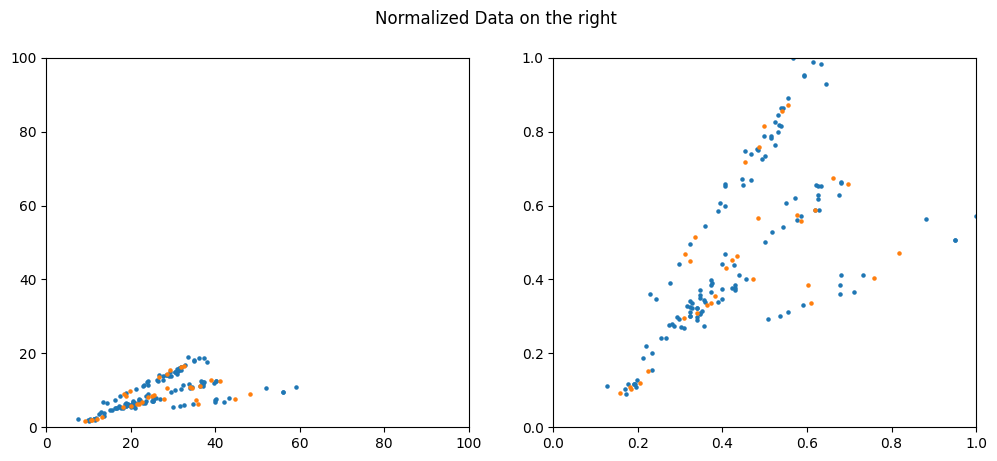

In [36]:
from matplotlib import pyplot as plt
# Create Subplot with two Figures
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.suptitle('Normalized Data on the right')

# Plot original data
ax1.set_ylim(0,100), ax1.set_xlim(0,100) # Set axis to be in range (0,100)
ax1.scatter(X_train[:,0], X_train[:,3], s=5) # Plot train data in blue
ax1.scatter(X_test[:,0], X_test[:,3], s=5) # Plot test data in orange

# Plot normalized data
ax2.set_ylim(0,1), ax2.set_xlim(0,1) # Set axis to be in range (0, 1)
ax2.scatter(X_train_n[:,0], X_train_n[:,3], s=5) # Plot train data in blue
ax2.scatter(X_test_n[:,0], X_test_n[:,3], s=5) # Plot test data in orange

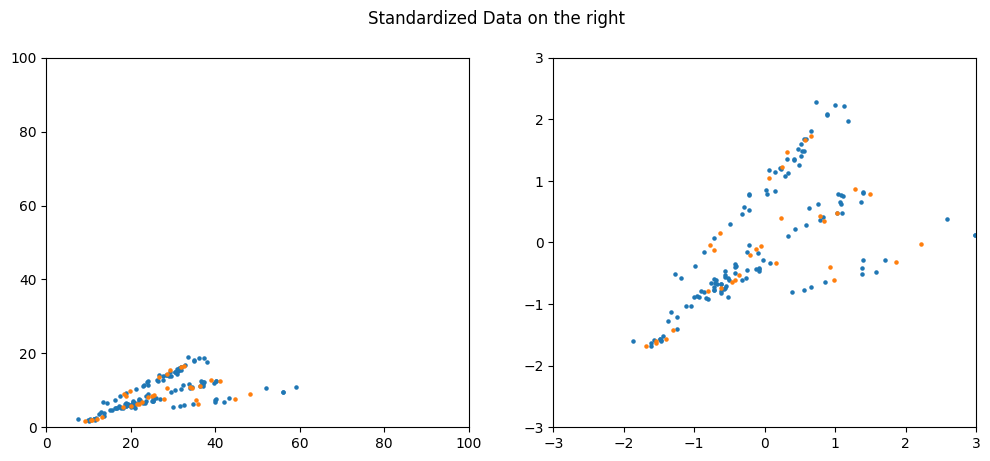

In [37]:
# Create Subplot with two Figures
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.suptitle('Standardized Data on the right')

# Plot original data
ax1.set_ylim(0,100), ax1.set_xlim(0,100) # Set axis to be in range (0,100)
ax1.scatter(X_train[:,0], X_train[:,3], s=5) # Plot train data in blue
ax1.scatter(X_test[:,0], X_test[:,3], s=5) # Plot test data in orange

# Plot standardized data
ax2.set_ylim(-3,3), ax2.set_xlim(-3,3) # Set axis to be in range (-3, 3)
ax2.scatter(X_train_s[:,0], X_train_s[:,3], s=5) # Plot train data in blue
ax2.scatter(X_test_s[:,0], X_test_s[:,3], s=5) # Plot test data in orange

## 5. Create Dummy Variables for Species

In [53]:
fish_data = pd.read_csv('fish.csv')
# Create Dummy Variables
species = pd.get_dummies(fish_data["Species"])
# add these dummies to fish_data
fish_data = pd.concat([fish_data, species], axis=1)
# drop the original species column
fish_data = fish_data.drop(columns=["Species"])
print(fish_data.to_numpy())


[[23.2 25.4 30.0 ... False False False]
 [24.0 26.3 31.2 ... False False False]
 [23.9 26.5 31.1 ... False False False]
 ...
 [12.1 13.0 13.8 ... False True False]
 [13.2 14.3 15.2 ... False True False]
 [13.8 15.0 16.2 ... False True False]]
